In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from operator import attrgetter
import datetime as dt
from scipy import stats

In [2]:
pd.options.mode.copy_on_write = True

In [3]:
sns.set(
    font_scale=1,
    style="whitegrid",
    rc={'figure.figsize':(20,7)}
        )
sns.set_palette(palette = 'Set2')

# Импорт файлов с Яндкес диска, проверка данных, изменение типов данных

## Пользователи

In [4]:
customers = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/QXrVDUoQvFhIcg')

In [5]:
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [6]:
customers.customer_id.nunique()

99441

In [7]:
customers.customer_unique_id.nunique()

96096

In [8]:
customers.dtypes

customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object

## Заказы

In [9]:
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/0zWmh1bYP6REbw')

In [10]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [11]:
orders.customer_id.nunique()

99441

In [12]:
orders.dtypes

order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object

In [13]:
# Приводим колонки с датами к формату даты
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']] = \
    orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
            'order_delivered_customer_date', 'order_estimated_delivery_date']].apply(pd.to_datetime)

## Товары

In [14]:
goods = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/xCsQ0FiC-Ue4Lg')

In [15]:
goods.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [16]:
goods.dtypes

order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object

In [17]:
# Приводим дату к формату даты
goods['shipping_limit_date'] = pd.to_datetime(goods.shipping_limit_date)

# Задача 1: сколько у нас пользователей, которые совершили покупку только один раз?

Покупки будем считать по таблице orders

In [18]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Согласно данным роспотребнадзора (https://zpp.rospotrebnadzor.ru/news/regional/477910), 'покупка считается завершенной, когда вы забрали товар из пункта выдачи'. Поэтому в нашем случае покупкой считаем заказ, который был оплачен (в столбце order_approved_at НЕ Nan) и доставлен ( в столбце order_status значится  'delivered')

In [20]:
purchases = orders.loc[((orders.order_approved_at.notna())
                        & (orders.order_status == 'delivered'))]

In [21]:
purchases.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    8
order_estimated_delivery_date    0
dtype: int64

Для того, чтобы посчитать, сколько пользователей совершили покупку 1 раз, достанем уникальный id пользователя из таблицы пользователей

In [22]:
purchases = purchases.merge(
    customers[['customer_id', 'customer_unique_id']], how='inner', on='customer_id')

In [23]:
only_one_purchases = purchases.groupby('customer_unique_id', as_index=False) \
    .order_id.nunique() \
    .query('order_id == 1') \
    .customer_unique_id.count()

# Задача 1: ответ

In [24]:
print(f'{only_one_purchases} пользователей совершили только одну покупку')

90545 пользователей совершили только одну покупку


In [25]:
# готовим данные для визуализации
all_users = purchases.customer_unique_id.nunique()
more_then_one = all_users - only_one_purchases
data_for_pie = [more_then_one / all_users, only_one_purchases / all_users]
labels = ['совершили более одной покупки', 'совершили одну покупку']

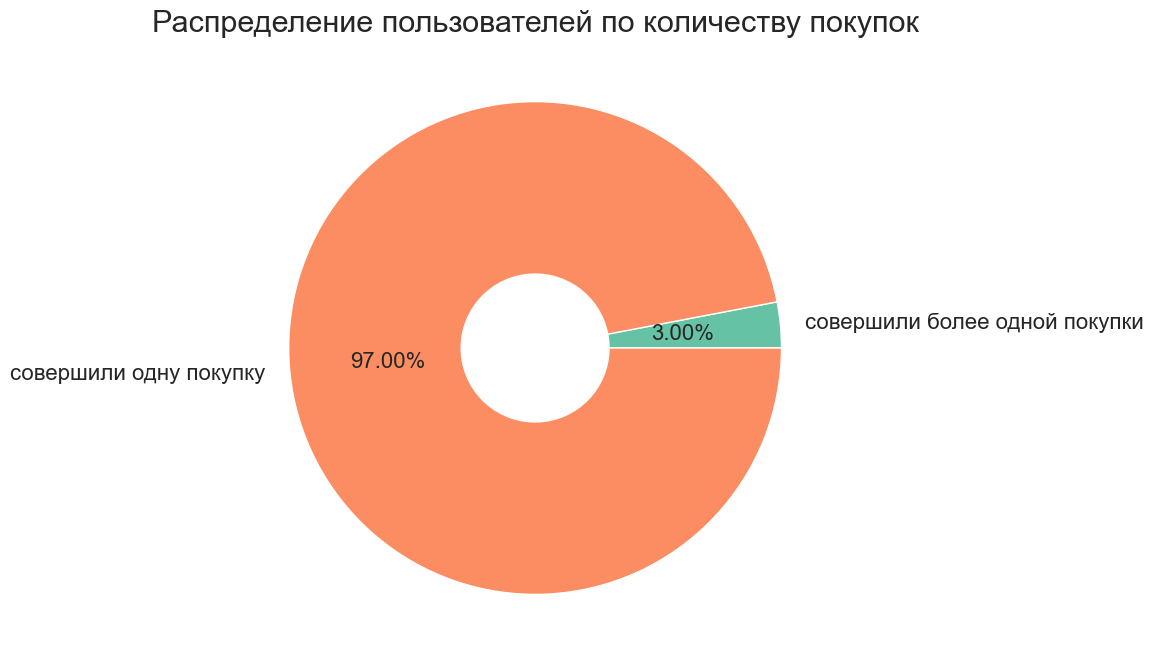

In [26]:
# рисуем круговую диаграмму
plt.figure(figsize=(8, 8))
plt.pie(x=data_for_pie, labels=labels, autopct='%1.2f%%', wedgeprops=dict(
    width=0.7), textprops={'fontsize': 16}, colors=sns.color_palette('Set2'))
plt.title('Распределение пользователей по количеству покупок', fontsize=22)
plt.show()

# Задача 2: сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)?

Смотрим, какие статусы есть кроме "delivered"

In [27]:
orders.query('order_status != "delivered"').order_status.unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'created', 'approved'], dtype=object)

Понимаем что большинство статусов относятся к процессу создания и транспортировки заказа, а статусов недоставленных заказов по сути два - "unavailable" и "canceled"

In [28]:
not_delivered_orders = orders.query(
    'order_status == "unavailable" or order_status == "canceled"')
not_delivered_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
397,1b9ecfe83cdc259250e1a8aca174f0ad,6d6b50b66d79f80827b6d96751528d30,canceled,2018-08-04 14:29:27,2018-08-07 04:10:26,NaT,NaT,2018-08-14
586,c272bcd21c287498b4883c7512019702,9582c5bbecc65eb568e2c1d839b5cba1,unavailable,2018-01-31 11:31:37,2018-01-31 14:23:50,NaT,NaT,2018-02-16
613,714fb133a6730ab81fa1d3c1b2007291,e3fe72696c4713d64d3c10afe71e75ed,canceled,2018-01-26 21:34:08,2018-01-26 21:58:39,2018-01-29 22:33:25,NaT,2018-02-22
687,37553832a3a89c9b2db59701c357ca67,7607cd563696c27ede287e515812d528,unavailable,2017-08-14 17:38:02,2017-08-17 00:15:18,NaT,NaT,2017-09-05


Обращает на себя внимание, что есть заказы со статусом "canceled", но при этом у курьера проставлена дата доставки. Я думаю что это заказы, от которых пользователь отказался при получении, поэтому такие заказы оставим, но в реальной жизни этот вопрос требует уточнения

In [29]:
# извлекаем месяц и год из столбца "order_estimated_delivery_date"
not_delivered_orders['estimated_delivery_month'] = orders.order_estimated_delivery_date.dt.to_period(
    "M")
# группируем датафрейм по месяцу и статусу, считаем количество заказов
# переносим статус в столбцы, заменяем NaN на нули
fail_reasons_by_month = not_delivered_orders.groupby(['estimated_delivery_month', 'order_status'])\
    .agg(num_orders=('order_id', 'nunique'))\
    .unstack(1)\
    .fillna(0)

In [30]:
# убираем первый уровень названия колонок
fail_reasons_by_month.columns = fail_reasons_by_month.columns.droplevel(0)
# считаем сумму отмененных по разным причинам заказов
fail_reasons_by_month['total'] = fail_reasons_by_month.canceled + \
    fail_reasons_by_month.unavailable
fail_reasons_by_month.head()

order_status,canceled,unavailable,total
estimated_delivery_month,,,
2016-09,1.0,0.0,1.0
2016-10,3.0,0.0,3.0
2016-11,14.0,5.0,19.0
2016-12,8.0,2.0,10.0
2017-02,2.0,2.0,4.0


# Задача 2: ответ

In [31]:
# считаем среднее количество недоставленных заказов в месяц
statuses = fail_reasons_by_month.mean().round(2)
statuses

order_status
canceled       24.04
unavailable    23.42
total          47.46
dtype: float64

# Задача 3: по каждому товару определить, в какой день недели товар чаще всего покупается

In [32]:
# к таблице товаров добавляем колонку 'order_purchase_timestamp' из таблицы заказов, в которой хранится время создания заказа
goods = goods.merge(orders[['order_id', 'order_purchase_timestamp',
                    'order_status', 'order_approved_at']], how='inner', on='order_id')
# добавляем колонку с названием дня недели, в который был куплен товар
goods['order_purchase_day'] = goods.order_purchase_timestamp.dt.day_name()

In [33]:
goods.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_status,order_approved_at,order_purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13 08:59:02,delivered,2017-09-13 09:45:35,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26 10:53:06,delivered,2017-04-26 11:05:13,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:33:31,delivered,2018-01-14 14:48:30,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:00:35,delivered,2018-08-08 10:10:18,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04 13:57:51,delivered,2017-02-04 14:10:13,Saturday


In [34]:
goods.isna().sum()

order_id                     0
order_item_id                0
product_id                   0
seller_id                    0
shipping_limit_date          0
price                        0
freight_value                0
order_purchase_timestamp     0
order_status                 0
order_approved_at           15
order_purchase_day           0
dtype: int64

## Задача 2 версия 1

Строго говоря, мы сейчас выведем ответ на вопрос, в какой день каждый товар ЗАКАЗЫВАЛИ (а не покупали) чаще всего, так как выше мы отпределили, что покупка - это только то, что уже получено пользователем. Но рискну предположить, что Василий от нас хочет именно день заказа. В реальной жизни я бы уточнила.

In [39]:
# группируем по product_id и дню заказа, посчитаем количество заказов в этот день
df1 = goods.groupby(['product_id', 'order_purchase_day'], as_index=False)\
    .agg(num_of_orders=('order_id', 'count'))
# создаем новый датафрейм, в котором для каждого заказа оставляем только дни, в которые достигнуто максимальное количество заказов
most_popular_days_1 = df1.groupby(['product_id'], as_index=False)\
    .apply(lambda x: x.nlargest(1, ['num_of_orders'], keep='all')).reset_index(drop=True)

/var/folders/_p/_yy9ms7d2kd_xf7s0tz6hd5m0000gn/T/ipykernel_25570/1455044578.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(1, ['num_of_orders'], keep='all')).reset_index(drop=True)


Внимание! Внутри функции nlargest использован параметр keep = 'all', это означает, что если у какого-то товара максимальное количество заказов достигнуто в несколько разных дней недели, то все эти дни недели будут выведены в результирующую таблицу. Если так не надо, замерить 'keep = "all"' на 'keep = "first"'

## Задача 2 версия 2

Если же Василий хочет от нас все-таки покупки, то решение будет выглядеть следующим образом

In [42]:
# оставляем только то, что было оплачено и доставлено, группируем по product_id и дню заказа, считаем количество заказов в этот день
df2 = goods.loc[((goods.order_approved_at.notna()) & (goods.order_status == 'delivered'))].groupby(['product_id', 'order_purchase_day'], as_index=False)\
    .agg(num_of_orders=('order_id', 'count'))
# создаем новый датафрейм, в котором для каждого заказа оставляем только дни, в которые достигнуто максимальное количество заказов
most_popular_days_2 = df1.groupby(['product_id'], as_index=False)\
    .apply(lambda x: x.nlargest(1, ['num_of_orders'], keep='all'))

/var/folders/_p/_yy9ms7d2kd_xf7s0tz6hd5m0000gn/T/ipykernel_25570/2479682668.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nlargest(1, ['num_of_orders'], keep='all'))


# Задача 3: ответ

## Версия 1

In [43]:
most_popular_days_1.head(20)

,product_id,order_purchase_day,num_of_orders
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday,1
1,00088930e925c41fd95ebfe695fd2655,Tuesday,1
2,0009406fd7479715e4bef61dd91f2462,Thursday,1
3,000b8f95fcb9e0096488278317764d19,Friday,1
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday,1
5,0011c512eb256aa0dbbb544d8dffcf6e,Thursday,1
6,00126f27c813603687e6ce486d909d01,Sunday,2
7,001795ec6f1b187d37335e1c4704762e,Saturday,3
8,001b237c0e9bb435f2e54071129237e9,Thursday,1
9,001b72dfd63e9833e8c02742adf472e3,Wednesday,5


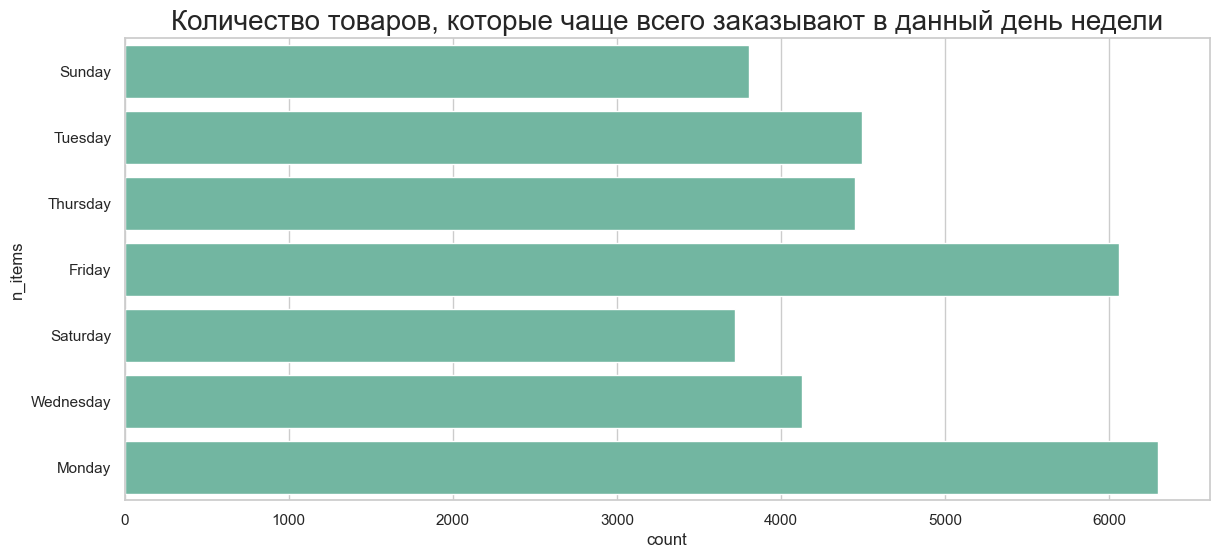

In [44]:
order = ['Monday', 'Tuesday', 'Wednesday',
         'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(14, 6))
plt.title('Количество товаров, которые чаще всего заказывают в данный день недели', fontsize=20)
sns.countplot(most_popular_days_1.order_purchase_day) #, order=order)
plt.ylabel('n_items')
plt.show()

## Версия 2

In [45]:
most_popular_days_2.head(20)

product_id order_purchase_day  num_of_orders
0  0   00066f42aeeb9f3007548bb9d3f33c38             Sunday              1
1  1   00088930e925c41fd95ebfe695fd2655            Tuesday              1
2  2   0009406fd7479715e4bef61dd91f2462           Thursday              1
3  3   000b8f95fcb9e0096488278317764d19             Friday              1
   4   000b8f95fcb9e0096488278317764d19          Wednesday              1
4  5   000d9be29b5207b54e86aa1b1ac54872            Tuesday              1
5  6   0011c512eb256aa0dbbb544d8dffcf6e           Thursday              1
6  7   00126f27c813603687e6ce486d909d01             Sunday              2
7  9   001795ec6f1b187d37335e1c4704762e           Saturday              3
8  13  001b237c0e9bb435f2e54071129237e9           Thursday              1
9  19  001b72dfd63e9833e8c02742adf472e3          Wednesday              5
10 20  001c5d71ac6ad696d22315953758fa04          Wednesday              1
11 23  00210e41887c2a8ef9f791ebc780cc36           Thursday              3
12 26  002159fe700ed3521f46cfcf6e941c76           Saturday              2
   28  002159fe700ed3521f46cfcf6e941c76            Tuesday              2
13 30  0021a87d4997a48b6cef1665602be0f5           Thursday              1
14 33  00250175f79f584c14ab5cecd80553cd           Saturday              6
15 35  002552c0663708129c0019cc97552d7d           Thursday              1
16 36  002959d7a0b0990fe2d69988affcbc80           Saturday              1
17 37  002af88741ba70c7b5cf4e4a0ad7ef85             Friday              6

# Задача 4: сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? 

Не стоит забывать, что внутри месяца может быть не целое количество недель. Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.

Используем датафрейм о покупках из первого задания, в котором отобраны заказы, которые были оплачены и доставлены, также в эту таблицу добавлен уникальный идентификатор пользователя из таблицы клиентов

In [46]:
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6


In [47]:
# добавляем столбец, в котором будет месяц и год заказа
purchases['order_purchase_month'] = purchases.order_purchase_timestamp.dt.strftime(
    '%Y-%m')
# группируем по user_id и месяцу, считаем общее количество заказов в месяц для каждого пользователя
users_purchases_per_month = purchases.groupby(['customer_unique_id', 'order_purchase_month'], as_index=False)\
    .agg(total_orders=('order_id', 'nunique'))
users_purchases_per_month.head()

,customer_unique_id,order_purchase_month,total_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1
2,0000f46a3911fa3c0805444483337064,2017-03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1


Добавим к этому датафрейму еще две колонки. Одна будет содержать количество недель в месяце, рассчитаное как количество дней в месяце / 7. Другая будет содержать искомую информацию - среднее количество покупок в неделю для каждого пользователя по месяцам

In [48]:
users_purchases_per_month['weeks_in_month'] = round((pd.to_datetime(
    users_purchases_per_month.order_purchase_month).dt.daysinmonth / 7), 2)
users_purchases_per_month['orders_mean_by_week'] = round(
    (users_purchases_per_month.total_orders / users_purchases_per_month.weeks_in_month), 2)

# Задача 4: ответ

In [49]:
# если не нужны месяцы, в которых ноль покупок, то ответ такой
users_purchases_per_month.sort_values('customer_unique_id').head()

,customer_unique_id,order_purchase_month,total_orders,weeks_in_month,orders_mean_by_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,1,4.43,0.23
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,1,4.43,0.23
2,0000f46a3911fa3c0805444483337064,2017-03,1,4.43,0.23
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,1,4.43,0.23
4,0004aac84e0df4da2b147fca70cf8255,2017-11,1,4.29,0.23


In [50]:
# если нужно посмотреть каждого пользователя во все месяцы, то можно смотреть эту таблицу
users_purchases_per_month.pivot(
    index='customer_unique_id', columns='order_purchase_month', values='orders_mean_by_week').fillna(0)

order_purchase_month,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,...,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
customer_unique_id,,,,,,,,,,,,,,,,,,,,,
0000366f3b9a7992bf8c76cfdf3221e2,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0
0000b849f77a49e4a4ce2b2a4ca5be3f,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.23,0.0,0.0,0.0
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.00,0.23,0.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.23,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffcf5a5ff07b0908bd4e2dbc735a684,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.23,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
fffea47cd6d3cc0a88bd621562a9d061,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.0,...,0.00,0.23,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0
ffff371b4d645b6ecea244b27531430a,0.0,0.0,0.0,0.0,0.25,0.00,0.0,0.00,0.00,0.0,...,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0


Последняя таблица не очень информативна с точки зрения данных, зато по ней видно, насколько низкая активность у пользвателей

# Задача 5: выполните когортный анализ пользователей. В период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц

Метрика Retention означает «удержание пользователей» или же «возвращаемость пользователей», иными словами, сколько людей вернулись в день Х (неделю Х, месяц Х) после первого входа в продукт. Retention измеряется в процентах, то есть показывает долю вернувшихся людей от изначально пришедших.

Разобьем пользователей на когорты по месяцу первого заказа. На мой взгляд, для оценки retension будет полезнее использовать этот показатель, а не покупки.

In [51]:
# добавим к таблице заказов уникальный id пользователя из таблицы пользователей
data = orders.merge(
    customers[['customer_id', 'customer_unique_id']], how='inner', on='customer_id')
# определим месяц каждого заказа
data['order_month'] = data['order_purchase_timestamp'].dt.to_period('M')
# на основании месяца первого заказа добавим когорту для каждого клиента
data['cohort'] = data.groupby('customer_unique_id')[
    'order_purchase_timestamp'].transform('min').dt.to_period('M')
data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,order_month,cohort
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-10,2017-09
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,2018-07,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,2018-08,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,2017-11,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,2018-02,2018-02


In [52]:
# смотрим, какие когорты у нас получились
data.cohort.unique()

<PeriodArray>
['2017-09', '2018-07', '2018-08', '2017-11', '2018-02', '2017-07', '2017-04',
 '2017-05', '2017-01', '2018-06', '2018-03', '2016-10', '2017-12', '2017-10',
 '2018-01', '2018-05', '2017-08', '2018-04', '2017-03', '2017-06', '2017-02',
 '2016-09', '2018-09', '2016-12', '2018-10']
Length: 25, dtype: period[M]

У нас задание "в период с января по декабрь выявите когорту с самым высоким retention на 3-й месяц". Тоесть к нам в анализ пойдут 12 когорт с 2017-01 по 2017-12, а retention мы будем разчитывать на столько месяцев, на сколько сможем (на всякий случай)

In [53]:
data = data.loc[(data.cohort >= '2017-01') & (data.cohort <= '2017-12')]
data.cohort.unique()

<PeriodArray>
['2017-09', '2017-11', '2017-07', '2017-04', '2017-05', '2017-01', '2017-12',
 '2017-10', '2017-08', '2017-03', '2017-06', '2017-02']
Length: 12, dtype: period[M]

In [54]:
# считаем количество уникальных пользователей, которые создали заказы в каждый из месяцев
cohort_data = data.groupby(['cohort', 'order_month'],  as_index=False).agg(
    n_customers=('customer_unique_id', 'nunique'))
# добавляем столбец с количеством месяцев от первой покупки
cohort_data['month_from_start'] = (
    cohort_data.order_month - cohort_data.cohort).apply(attrgetter('n'))
# реорганизуем таблицу, чтобы месяцы от первого заказа были столбцами, заменим NaN на нули
cohort_pivot = cohort_data.pivot_table(
    index='cohort', columns='month_from_start', values='n_customers').fillna(0)
cohort_pivot

month_from_start,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,764.0,3.0,2.0,1.0,3.0,1.0,4.0,1.0,1.0,0.0,3.0,1.0,6.0,3.0,1.0,1.0,2.0,3.0,1.0
2017-02,1752.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,3.0,4.0,2.0,5.0,3.0,3.0,2.0,1.0,1.0,4.0,0.0
2017-03,2636.0,13.0,10.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,4.0,6.0,3.0,4.0,6.0,2.0,4.0,0.0
2017-04,2352.0,14.0,5.0,4.0,8.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,5.0,0.0,0.0
2017-05,3596.0,18.0,18.0,14.0,11.0,12.0,15.0,6.0,9.0,11.0,9.0,12.0,9.0,1.0,7.0,9.0,0.0,0.0,0.0
2017-06,3139.0,15.0,11.0,13.0,8.0,12.0,12.0,7.0,4.0,7.0,10.0,11.0,5.0,4.0,6.0,0.0,0.0,0.0,0.0
2017-07,3894.0,20.0,14.0,10.0,11.0,8.0,12.0,4.0,7.0,10.0,9.0,12.0,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2017-08,4184.0,29.0,14.0,11.0,15.0,22.0,12.0,11.0,6.0,6.0,10.0,8.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-09,4130.0,28.0,22.0,12.0,19.0,9.0,9.0,10.0,12.0,7.0,11.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# Расcчитаем retention rate
retention_matrix = (cohort_pivot.divide(cohort_pivot[0], axis=0)).round(4)

# Задача 5: ответ

In [56]:
print(
    f'с января по декабрь когорта {retention_matrix[3].idxmax()} имеет самый высокий retention на 3-й месяц')

с января по декабрь когорта 2017-06 имеет самый высокий retention на 3-й месяц


# Задача 5: визуализация 

In [57]:
ur_style = (retention_matrix
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            # раскрашиваем ячейки по столбцам
            .background_gradient(cmap='viridis')
            .highlight_null('white')  # делаем белый фон для значений NaN
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
ur_style

month_from_start,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19
cohort,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.39%,0.26%,0.13%,0.39%,0.13%,0.52%,0.13%,0.13%,0.00%,0.39%,0.13%,0.79%,0.39%,0.13%,0.13%,0.26%,0.39%,0.13%
2017-02,100.00%,0.23%,0.29%,0.11%,0.40%,0.11%,0.23%,0.17%,0.17%,0.23%,0.11%,0.29%,0.17%,0.17%,0.11%,0.06%,0.06%,0.23%,0.00%
2017-03,100.00%,0.49%,0.38%,0.38%,0.34%,0.15%,0.15%,0.30%,0.34%,0.08%,0.38%,0.15%,0.23%,0.11%,0.15%,0.23%,0.08%,0.15%,0.00%
2017-04,100.00%,0.60%,0.21%,0.17%,0.34%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.21%,0.00%,0.00%
2017-05,100.00%,0.50%,0.50%,0.39%,0.31%,0.33%,0.42%,0.17%,0.25%,0.31%,0.25%,0.33%,0.25%,0.03%,0.19%,0.25%,0.00%,0.00%,0.00%
2017-06,100.00%,0.48%,0.35%,0.41%,0.25%,0.38%,0.38%,0.22%,0.13%,0.22%,0.32%,0.35%,0.16%,0.13%,0.19%,0.00%,0.00%,0.00%,0.00%
2017-07,100.00%,0.51%,0.36%,0.26%,0.28%,0.21%,0.31%,0.10%,0.18%,0.26%,0.23%,0.31%,0.13%,0.26%,0.00%,0.00%,0.00%,0.00%,0.00%
2017-08,100.00%,0.69%,0.33%,0.26%,0.36%,0.53%,0.29%,0.26%,0.14%,0.14%,0.24%,0.19%,0.10%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
2017-09,100.00%,0.68%,0.53%,0.29%,0.46%,0.22%,0.22%,0.24%,0.29%,0.17%,0.27%,0.07%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


# Задача 6: построить RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию

Для кластеризации будем использовать следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время.

В качестве исходных данных используем датафрейм purchases из задачи 1

In [58]:
purchases.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,order_purchase_month
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,2017-10
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,2018-07
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,2018-08
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,2017-11
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,2018-02


В датафрейме не хватает стоимости заказа, рассчитаем ее по таблице goods

In [59]:
goods.head(20)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_timestamp,order_status,order_approved_at,order_purchase_day
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,2017-09-13 08:59:02,delivered,2017-09-13 09:45:35,Wednesday
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,2017-04-26 10:53:06,delivered,2017-04-26 11:05:13,Wednesday
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,2018-01-14 14:33:31,delivered,2018-01-14 14:48:30,Sunday
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,2018-08-08 10:00:35,delivered,2018-08-08 10:10:18,Wednesday
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,2017-02-04 13:57:51,delivered,2017-02-04 14:10:13,Saturday
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.90,12.69,2017-05-15 21:42:34,delivered,2017-05-17 03:55:27,Monday
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.90,11.85,2017-12-10 11:53:48,delivered,2017-12-10 12:10:31,Sunday
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.00,70.75,2018-07-04 12:08:27,delivered,2018-07-05 16:35:48,Wednesday
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.95,11.65,2018-03-19 18:40:33,delivered,2018-03-20 18:35:21,Monday
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.99,11.40,2018-07-02 13:59:39,delivered,2018-07-02 14:10:56,Monday


Из первых 20 записей таблицы видно, что если в одном заказе несколько одинаковых товаров (как в заказе 0008288aa423d2a3f00fcb17cd7d8719), то они дублируются отдельными строчками, поэтому, чтобы рассчитать общую стоимость заказа, будем просто аггрегировать колонку price

In [60]:
# добавляем столбец со стоимотью заказа
purchases_rfm = purchases.merge(goods.groupby(
    'order_id', as_index=False).price.sum(), how='left', on='order_id')
# определяем дату самой последней покупки в датафрейме
last_date = purchases.order_purchase_timestamp.max()
# создаем датафрейм с нужными нам метриками
customers_rfm = purchases_rfm.groupby('customer_unique_id', as_index=False).agg(last_purchase=(
    'order_purchase_timestamp', 'max'), frequency=('order_id', 'nunique'), monetary=('price', 'sum'))
customers_rfm['recency'] = (last_date - customers_rfm.last_purchase).dt.days

In [61]:
# проверяем для всех ли покупок нашлась их стоимость
purchases_rfm.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     2
order_delivered_customer_date    8
order_estimated_delivery_date    0
customer_unique_id               0
order_purchase_month             0
price                            0
dtype: int64

In [62]:
customers_rfm.head()

,customer_unique_id,last_purchase,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1,129.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1,18.90,114
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1,69.00,536
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1,25.99,320
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1,180.00,287


Посмотрим на распределения нужных нам характеристик

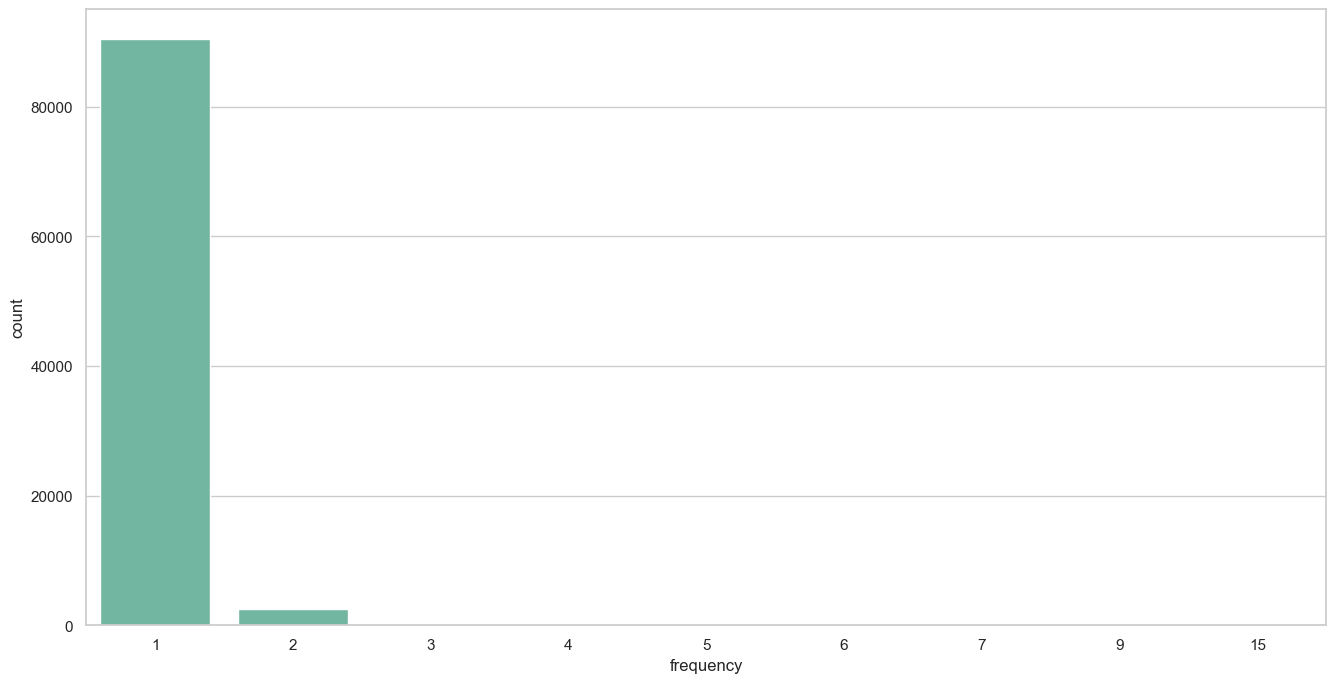

In [63]:
plt.figure(figsize=(16, 8))
sns.countplot(data=customers_rfm, x='frequency')
plt.show()

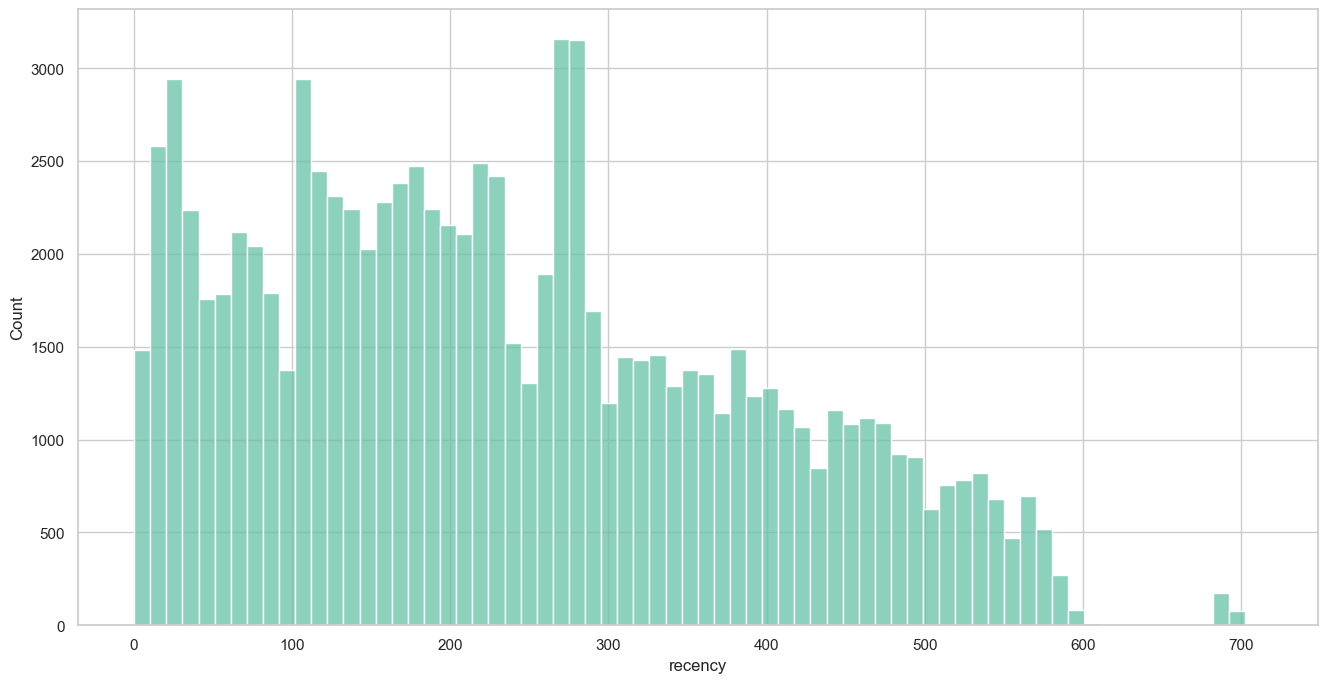

In [65]:
plt.figure(figsize=(16, 8))
sns.histplot(customers_rfm['recency'])
plt.show()

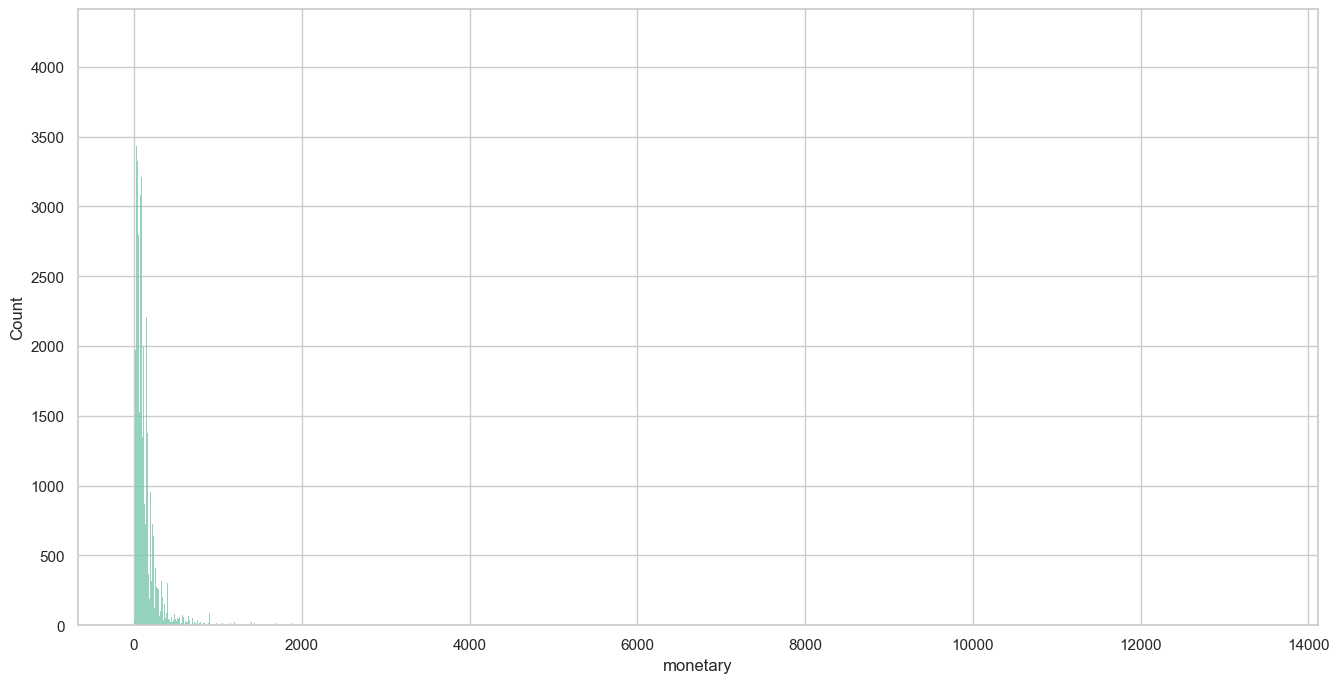

In [68]:
plt.figure(figsize=(16, 8))
sns.histplot(customers_rfm['monetary'])
plt.show()

In [69]:
# выведем описательные статистики
customers_rfm.describe()

,last_purchase,frequency,monetary,recency
count,93345,93345.000000,93345.000000,93345.000000
mean,2018-01-04 04:52:38.791558400,1.033414,141.623308,236.896599
min,2016-09-15 12:16:38,1.000000,0.850000,0.000000
25%,2017-09-17 19:30:23,1.000000,47.650000,113.000000
50%,2018-01-23 01:12:12,1.000000,89.760000,218.000000
75%,2018-05-07 17:29:05,1.000000,154.750000,345.000000
max,2018-08-29 15:00:37,15.000000,13440.000000,713.000000
std,NaN,0.209088,215.705007,152.554001


Форма всех распределений далека от формы нормального распределения. По показателю recency пользователей можно разделить на основании значений квартилей. Что касается frecuency, как мы уже выяснили раньше, 97 процентов пользователей совершили только 1 заказ, поэтому разбиение по квартилям не подойдет (все они равны единице). Еще обращает на себя внимание гиганская разница между медианным и максимальным значением у показателя monetary. Видимо есть покупатели, которые покупают в розницу, и оптовые покупатели. Эти моменты надо постараться учесть при разбиении на группы.
Поскольку большинство пользователей сделали всего одну покупку, то все recency, frequency и monetary будем считать за всю историю наблюдений, а не за какой-то конкретный временной интервал

## Frequency

In [70]:
customers_rfm.frequency.value_counts()

frequency
1     90545
2      2572
3       181
4        28
5         9
6         5
7         3
9         1
15        1
Name: count, dtype: int64

In [71]:
# считаем долю пользователей с четырьмя и более покупками в общей структуре продаж
customers_rfm.query('frequency >= 4').monetary.sum() / \
    customers_rfm.monetary.sum() * 100

0.23570224025794562

Разбивать пользователей по квартилям не имеет смысла, так как все квартили равны единице (абсолютное большинство пользователей имеют одну покупку). Разобьем пользователей по количеству покупок: одна, две, три и более. Выделять четвертую группу не целесообразно, так как 4 и более покупки совершили всего около 40 человек и на их долю пришлось 0.2 процента продаж

In [72]:
def frequency_segmentation(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    else:
        return 3

In [73]:
customers_rfm['F_segment'] = customers_rfm.frequency.apply(
    frequency_segmentation)

In [74]:
customers_rfm.sort_values('frequency', ascending=False)

,customer_unique_id,last_purchase,frequency,monetary,recency,F_segment
51426,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08-20 19:14:26,15,714.63,8,3
22779,3e43e6105506432c953e165fb2acf44c,2018-02-27 18:36:39,9,1000.85,182,3
36705,6469f99c1f9dfae7733b25662e7f1782,2018-06-28 00:43:34,7,664.20,62,3
73911,ca77025e7201e3b30c44b472ff346268,2018-06-01 11:38:29,7,806.61,89,3
10060,1b6c7548a2a1f9037c1fd3ddfed95f33,2018-02-14 13:22:12,7,809.21,196,3
...,...,...,...,...,...,...
31559,5656a8fabc8629ff96b2bc14f8c09a27,2017-11-30 16:25:41,1,14.03,271,1
31558,56560124a5cc70119deb685775639ea7,2017-11-29 08:15:24,1,19.90,273,1
31557,5655ee330a79bd1fd1e5fb220c2436dd,2018-04-15 16:48:15,1,123.00,135,1
31556,5655967ad654dc2d2affca3502631db7,2017-09-16 13:16:16,1,44.35,347,1


## Recency

<Axes: ylabel='recency'>

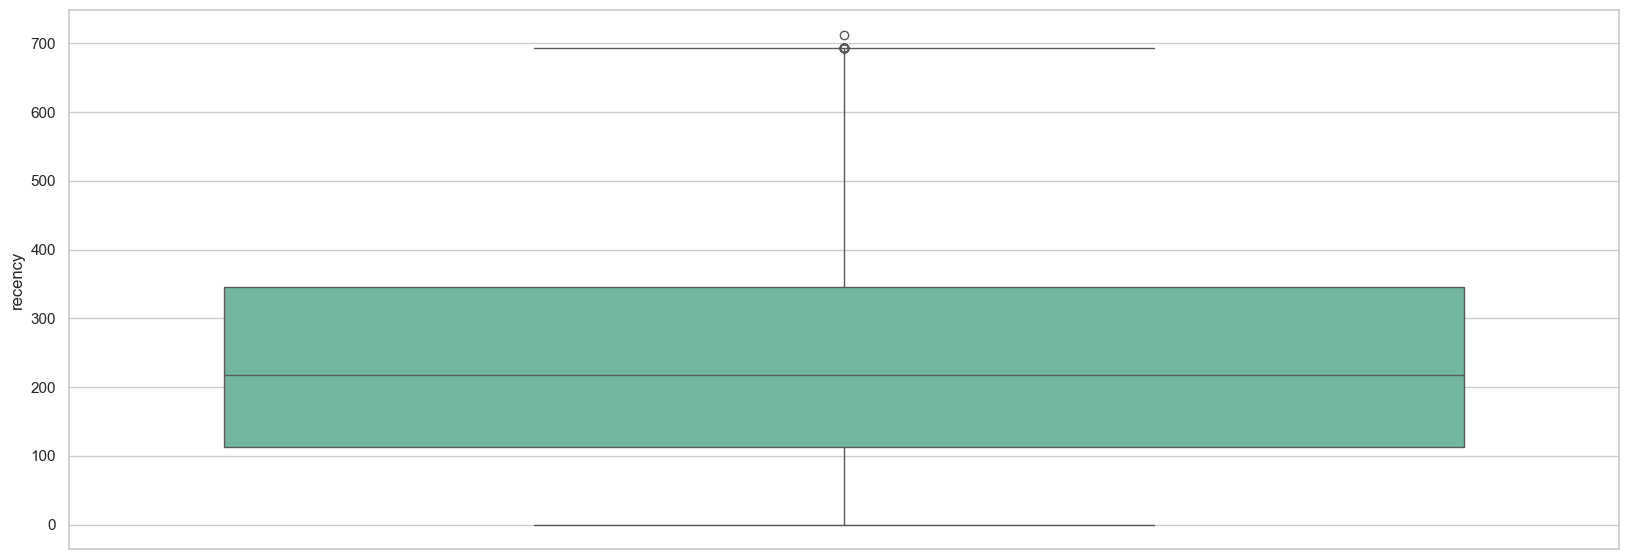

In [75]:
sns.boxplot(data=customers_rfm.recency)

Для разбиения пользователей по данному показателю можно использовать квартили: с 25 по 75 квартили условно средние значения recency, меньше 25 квартиля - низкие, больше 75 - высокие. Можно было бы разбить на 4 группы, но во-первых бОльшее количество групп затрудняет интерпретацию данных, а во-вторых по первому показателю мы тоже разбили на 3 три группы.

In [76]:
# создаем словарь с нужными значениями квантилей
descr_stats = customers_rfm.describe()
recency_quant = descr_stats.recency.loc[['25%', '50%', '75%']].to_dict()

In [77]:
recency_quant

{'25%': 113.0, '50%': 218.0, '75%': 345.0}

In [78]:
# создаем функцию, которая разбивает данные по квартилям
def quartile_segmentation(x, quartiles):
    if x < quartiles['25%']:
        return 3
    elif x > quartiles['75%']:
        return 1
    else:
        return 2

In [79]:
customers_rfm['R_segment'] = customers_rfm.recency.apply(
    lambda x: quartile_segmentation(x, quartiles=recency_quant))

In [80]:
# проверяем зраницы классов, можно менять запрос, стобы посмотреть разные сегменты
customers_rfm.query('R_segment == 1').sort_values('recency')

,customer_unique_id,last_purchase,frequency,monetary,recency,F_segment,R_segment
69396,be137b4379f0f1c99e46d7c5ec7a4cdb,2017-09-17 09:04:46,1,138.00,346,1,1
59339,a296df1cf7557b871094bda3d269972e,2017-09-16 21:41:43,1,38.99,346,1,1
34760,5efc4f7cfd77f13ba84f279a14e10070,2017-09-17 11:00:01,1,37.89,346,1,1
9047,189a05aa2dde9d531cb955584df08c1f,2017-09-16 16:25:19,1,270.00,346,1,1
48126,83c09d2636754fee9e24a68c6abb16e7,2017-09-17 09:58:40,1,610.00,346,1,1
...,...,...,...,...,...,...,...
35809,61db744d2f835035a5625b59350c6b63,2016-10-03 21:13:36,1,36.49,694,1,1
7427,14359ea0c7a105749c0a56478825b015,2016-10-04 09:16:33,1,32.49,694,1,1
74973,cd5a5843d35eebdf90368bf24d4a04cf,2016-10-04 09:06:10,1,49.99,694,1,1
74152,cb1bc069e25d9c59773c85a2e2a46713,2016-10-04 14:44:33,1,249.90,694,1,1


## Monetary

<Axes: ylabel='monetary'>

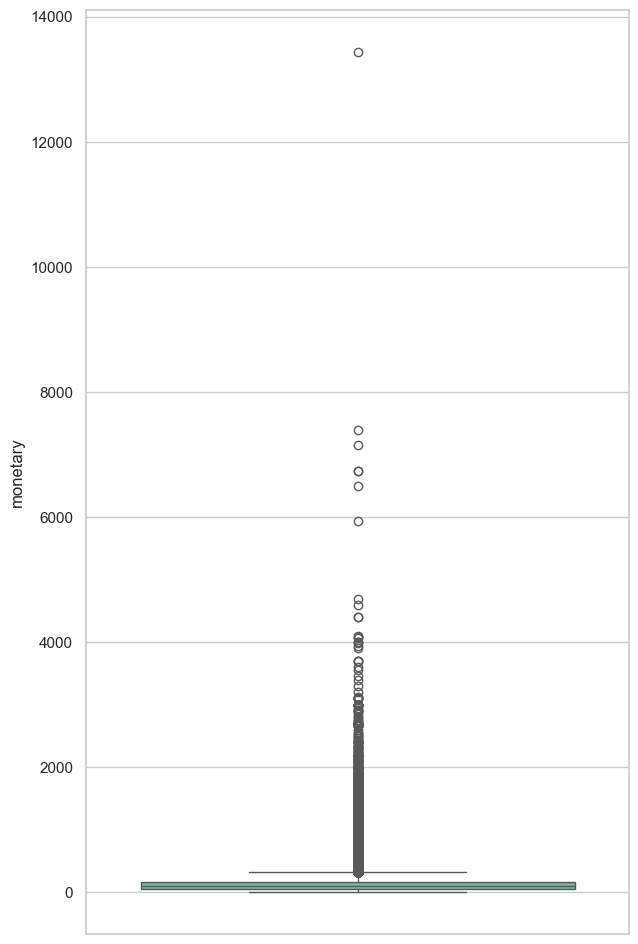

In [81]:
plt.figure(figsize=(7, 12))
sns.boxplot(data=customers_rfm.monetary)

Показатель monetary изучим подробнее с целью разделить оптовых и розничных клиентов (если это возможно)

In [84]:
# Процентные значения
percentiles_values = [0.00, 0.25, 0.50, 0.75, 0.90, 0.99, 0.999, 1.00]
percentiles_labels = ['0%', '25%', '50%', '75%', '90%', '99%', '99.9%', '100%']

# Рассчитаем интересующие нас процентили и соберем их в датафрейм
procentiles = pd.DataFrame(index=percentiles_labels, columns=['perc_value'])
for label, value in zip(percentiles_labels, percentiles_values):
    procentiles.at[label, 'perc_value'] = customers_rfm.monetary.quantile(value).round(2)

# Посчитаем кумулятивную сумму продаж и количество клиентов для каждого процентиля
procentiles['cum_revenue'] = 0.0
procentiles['cum_n_customers'] = 0

for index in procentiles.index:
    monetary_threshold = procentiles.at[index, 'perc_value']
    procentiles.at[index, 'cum_revenue'] = customers_rfm.loc[customers_rfm.monetary >= monetary_threshold, 'monetary'].sum()
    procentiles.at[index, 'cum_n_customers'] = customers_rfm.loc[customers_rfm.monetary >= monetary_threshold, 'customer_unique_id'].nunique()

# Общая сумма дохода
procentiles['total'] = customers_rfm.monetary.sum()

# Кумулятивные относительные доходы
procentiles['cum_relative_revenue'] = (procentiles['cum_revenue'] / procentiles['total']).round(2)

# Показатели для каждого процентиля (не кумулятивные)
procentiles['revenue'] = procentiles['cum_revenue'].diff(periods=-1).fillna(procentiles['cum_revenue'])
procentiles['n_customers'] = procentiles['cum_n_customers'].diff(periods=-1).fillna(procentiles['cum_n_customers'])
procentiles['relative_revenue'] = procentiles['cum_relative_revenue'].diff(periods=-1).fillna(procentiles['cum_relative_revenue'])

# Вывод результата
procentiles

,perc_value,cum_revenue,cum_n_customers,total,cum_relative_revenue,revenue,n_customers,relative_revenue
0%,0.85,13219827.68,93345,13219827.68,1.00,677465.48,23303.0,0.05
25%,47.65,12542362.20,70042,13219827.68,0.95,1528333.33,23368.0,0.12
50%,89.76,11014028.87,46674,13219827.68,0.83,2747573.23,23337.0,0.20
75%,154.75,8266455.64,23337,13219827.68,0.63,2827240.17,13982.0,0.22
90%,279.99,5439215.47,9355,13219827.68,0.41,3921272.65,8419.0,0.30
99%,1004.99,1517942.82,936,13219827.68,0.11,1203890.31,842.0,0.09
99.9%,2299.98,314052.51,94,13219827.68,0.02,300612.51,93.0,0.02
100%,13440.0,13440.00,1,13219827.68,0.00,13440.00,1.0,0.00


Из таблицы представленной вывше видно, что 25 процентов клиентов с наибольшией суммой заказов приносят магазину аж 63 процента дохода. Возможно магазин ориентирован опт. Сегментацию по показателю monetary проведем следущим образом: по 75 и 99 процентилям. Условно считаем что до 75 процентиля - это розничные клиенты, выше 99 - крупный опт, тот 1 процент клиентов, который приносит компании 11 процентов прибыли. С последнией категорией клиентов может протребоваться персональная работа менеджеров, поэтому думаю что разумно выделить их в отдельную категорию

In [86]:
# создаем словарь со значениями процентилей
monetary_per_values = procentiles.perc_value.to_dict()
# создаем функцию для сегментации по monetary


def monetary_segmentation(x, diction):
    if x < diction['75%']:
        return 1
    elif x > diction['99%']:
        return 3
    else:
        return 2

In [87]:
customers_rfm['M_segment'] = customers_rfm.monetary.apply(
    lambda x: monetary_segmentation(x, diction=monetary_per_values))
customers_rfm['rfm_class'] = customers_rfm['R_segment'].map(
    str) + customers_rfm['F_segment'].map(str) + customers_rfm['M_segment'].map(str)

In [88]:
# проверяем границы классов, можно менять запрос чтобы посмотреть разные сегменты
customers_rfm.query('M_segment == 3').sort_values('monetary', ascending=False)

,customer_unique_id,last_purchase,frequency,monetary,recency,F_segment,R_segment,M_segment,rfm_class
3724,0a0a92112bd4c708ca5fde585afaa872,2017-09-29 15:24:52,1,13440.00,333,1,2,3,213
79625,da122df9eeddfedc1dc1f5349a1a690c,2017-04-01 15:58:41,2,7388.00,514,2,1,3,123
43166,763c8b1c9c68a0229c42c9fc6f662b93,2018-07-15 14:49:44,1,7160.00,45,1,3,3,313
80452,dc4802a71eae9be1dd28f5d788ceb526,2017-02-12 20:37:36,1,6735.00,562,1,1,3,113
25436,459bef486812aa25204be022145caa62,2018-07-25 18:10:17,1,6729.00,34,1,3,3,313
...,...,...,...,...,...,...,...,...,...
16391,2cda0e652e045b89ae13987cd09a1327,2017-12-18 16:18:06,1,1009.00,253,1,2,3,213
4299,0b8f908a3b8e307be5c917414bc8275d,2017-12-11 19:39:39,1,1009.00,260,1,2,3,213
11944,2099f93ac5ea679cf2eb1de091ab87c9,2018-04-24 22:52:02,1,1007.00,126,1,2,3,213
82162,e105dec92cee6465244879914c792707,2018-03-07 16:51:09,1,1005.63,174,1,2,3,213


Для каждого класса построим границы показателей monetary, frecuency и recency

In [89]:
rfm_classes = customers_rfm.groupby('rfm_class').agg(n_customers=('customer_unique_id', 'nunique'), recency_min=('recency', 'min'), recency_max=(
    'recency', 'max'), frecuency_min=('frequency', 'min'), frecuency_max=('frequency', 'max'), monetary_min=('monetary', 'min'), monetary_max=('monetary', 'max'))

# Задача 6: ответ

В таблице указано количество клиентов в людях, min и max recency в днях, min и max recency в количестве покупок за всю историю наблюдений, min и max monetary  - как сумма всех покупок клиента за всю историю наблюдений

In [90]:
rfm_classes

,n_customers,recency_min,recency_max,frecuency_min,frecuency_max,monetary_min,monetary_max
rfm_class,,,,,,,
111,17222,346,713,1,1,2.29,154.70
112,5256,346,694,1,1,154.80,1004.99
113,241,346,690,1,1,1014.60,6735.00
121,248,346,691,2,2,20.79,153.95
122,281,346,689,2,2,154.89,939.87
123,8,350,514,2,2,1032.40,7388.00
131,18,349,601,3,6,20.70,147.60
132,23,351,580,3,4,159.80,682.99
133,1,346,346,3,3,1189.70,1189.70


# Задача 6: визуализация

<Axes: title={'center': 'Количество клиентов в разных RFM сегментах '}, xlabel='rfm_class', ylabel='n_customers'>

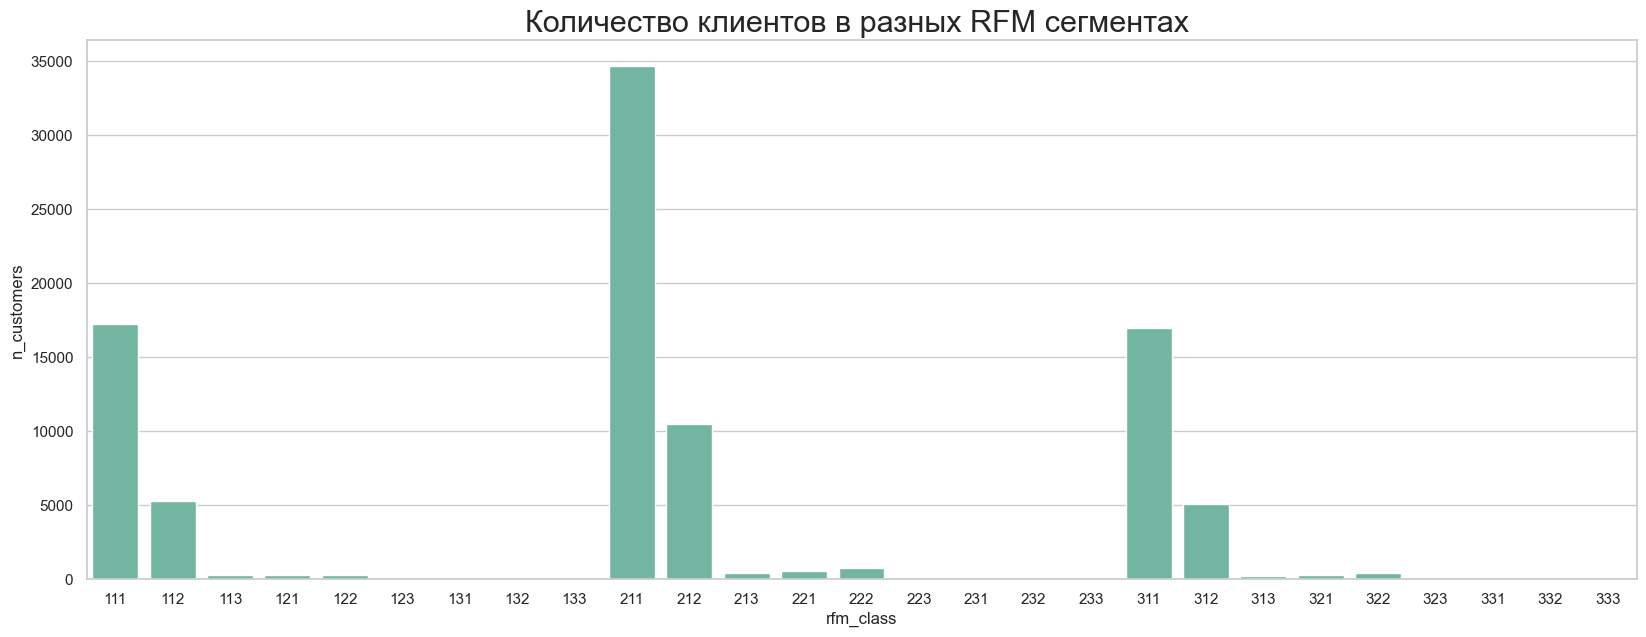

In [91]:
plt.title('Количество клиентов в разных RFM сегментах ', fontsize=22)
sns.barplot(data=rfm_classes.reset_index(), x='rfm_class', y='n_customers')

<Axes: title={'center': 'Доходность от разных RFM сегментов '}, xlabel='rfm_class', ylabel='monetary'>

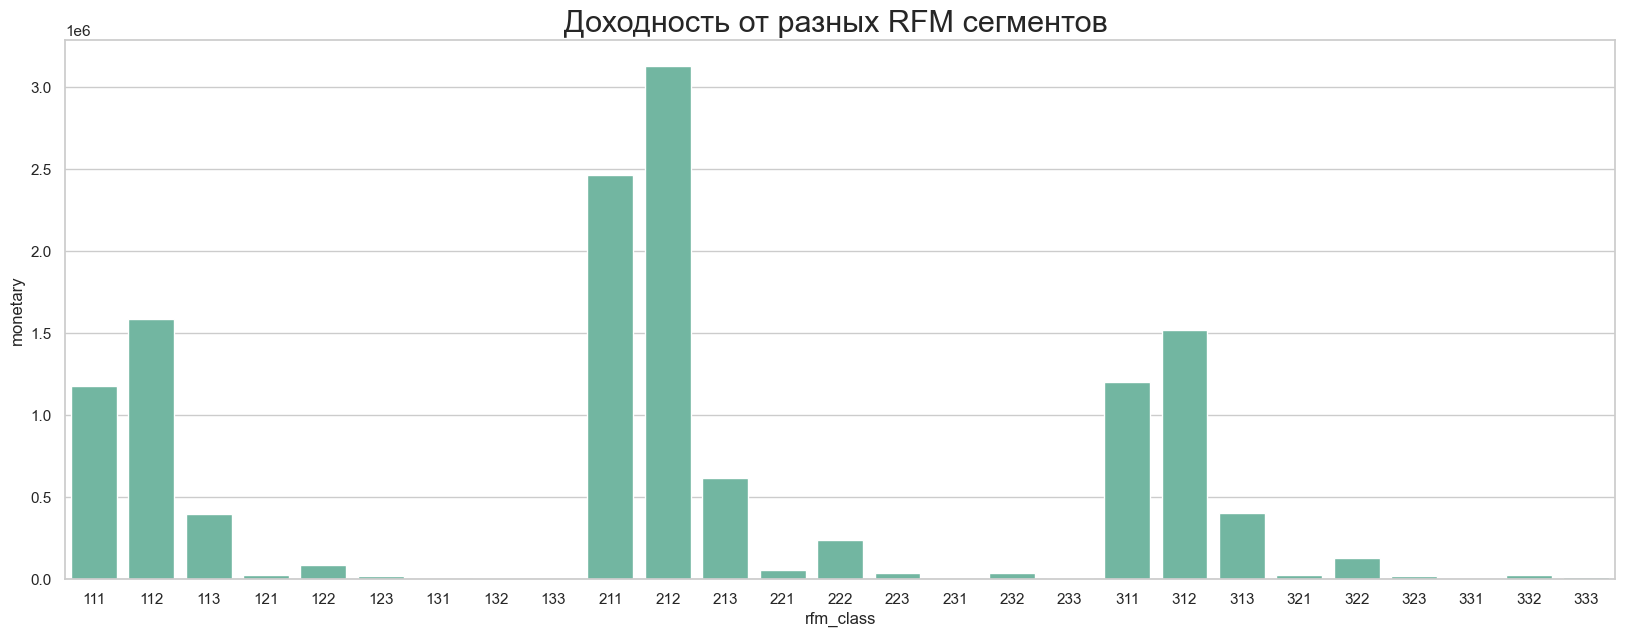

In [92]:
plt.title('Доходность от разных RFM сегментов ', fontsize=22)
sns.barplot(data=customers_rfm.groupby(
    'rfm_class', as_index=False).monetary.sum(), x='rfm_class', y='monetary')

# Задача 6: дополнительный анализ

Очевидно, что одна из ключевых проблем магазина - удержание пользователей (они делают 1 заказ и больше не возвращаются). Поэтому посмотрим на показатель frequency в разрезе recency и monary, иными словами проверим, различается ли распределение пользователей по frequency в разных группах recency и monetary. Возможно найдется какая-то группа, где заказывают чаще.

## FR анализ

In [93]:
# группируем по recency и считаем количество клиентов в каждой из категорий frequency
RF = customers_rfm.groupby('R_segment').agg(F=('F_segment', 'value_counts'))
RF = RF.unstack(level=1)
RF = RF.droplevel(level=0, axis=1)
# считаем относительные значения для категорий
RF['total'] = customers_rfm.groupby('R_segment').customer_unique_id.count()
RF['1_rel'] = (RF[1] / RF.total * 100).round(2)
RF['2_rel'] = (RF[2] / RF.total * 100).round(2)
RF['3_rel'] = (RF[3] / RF.total * 100).round(2)
RF

F_segment,1,2,3,total,1_rel,2_rel,3_rel
R_segment,,,,,,,
1,22719,537,42,23298,97.51,2.30,0.18
2,45555,1337,110,47002,96.92,2.84,0.23
3,22271,698,76,23045,96.64,3.03,0.33


In [94]:
# готовим данные для графиков
data1 = RF.drop(columns=[1, 2, 3, 'total']).loc[1]
data2 = RF.drop(columns=[1, 2, 3, 'total']).loc[2]
data3 = RF.drop(columns=[1, 2, 3, 'total']).loc[3]
labels = ['1', '2', '3']
explode = [0.1, 0.25, 0.4]

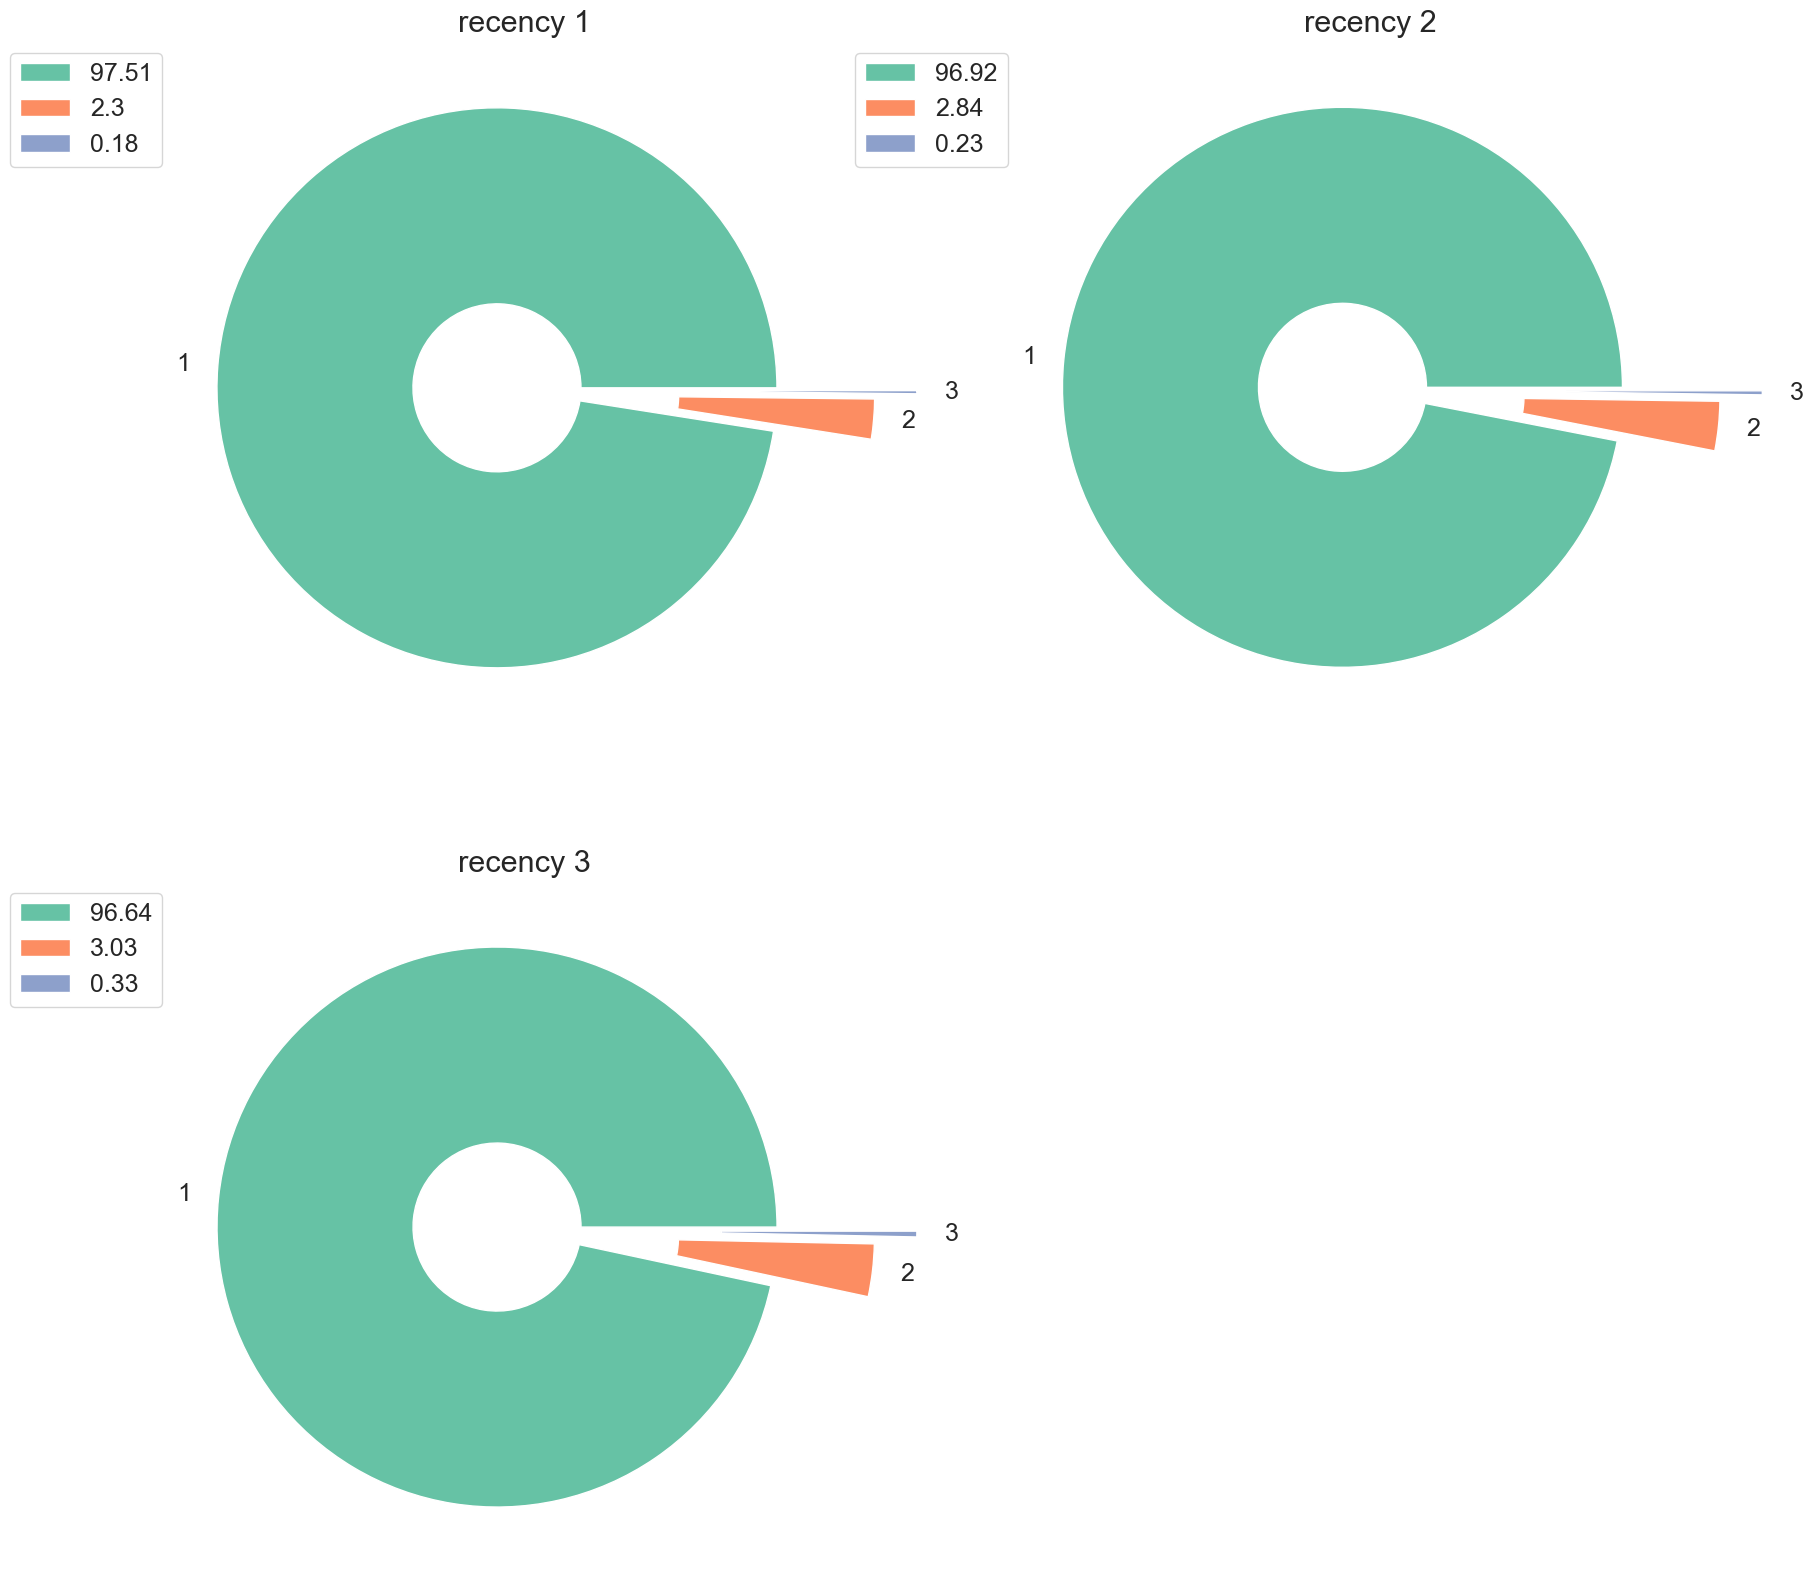

In [95]:
# рисуем графики
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title('recency 1', fontsize=22)
result = plt.pie(x=data1, labels=labels, explode=explode, wedgeprops=dict(
    width=0.7), textprops={'fontsize': 18}, colors=sns.color_palette('Set2'))
plt.legend(result[0], data1,  bbox_to_anchor=(0.00, 1), fontsize=18)
plt.subplot(2, 2, 2)
plt.title('recency 2', fontsize=22)
result = plt.pie(x=data2, labels=labels, explode=explode, wedgeprops=dict(
    width=0.7), textprops={'fontsize': 18}, colors=sns.color_palette('Set2'))
plt.legend(result[0], data2,  bbox_to_anchor=(0.00, 1), fontsize=18)
plt.subplot(2, 2, 3)
plt.title('recency 3', fontsize=22)
result = plt.pie(x=data3, labels=labels, explode=explode, wedgeprops=dict(
    width=0.7), textprops={'fontsize': 18}, colors=sns.color_palette('Set2'))
plt.legend(result[0], data3,  bbox_to_anchor=(0.00, 1), fontsize=18)
plt.show()

Проверим гипотезу о том, что соотношение количества пользователей из разных групп frequency в разных сегментах recency одинаково. Условно говоря проверим, что диаграммы, представленные выше, не различаются

In [96]:
# для этого будем использовать перавые три столбца таблицы RF
RF

F_segment,1,2,3,total,1_rel,2_rel,3_rel
R_segment,,,,,,,
1,22719,537,42,23298,97.51,2.30,0.18
2,45555,1337,110,47002,96.92,2.84,0.23
3,22271,698,76,23045,96.64,3.03,0.33


In [97]:
# считаем хи-квадрат
res = stats.chi2_contingency(RF.drop(columns=[1, 2, 3, 'total']))
res

Chi2ContingencyResult(statistic=0.15669772015701255, pvalue=0.9970864306444848, dof=4, expected_freq=array([[97.02009901,  2.72324255,  0.24665844],
       [97.02009901,  2.72324255,  0.24665844],
       [97.02980199,  2.7235149 ,  0.24668311]]))

## FR анализ вывод

In [98]:
print(
    f'Статистика критерия равна {res[0].round(4)}, уровень значимости {res[1].round(4)}')
if res[1] < 0.05:
    print('Уровень значимости меньше 0.05, значит мы отвергаем гипотезу о равенстве распределения frequency в трех группах recency.\nНужен дополнительный анализ')
else:
    print('Уровень значимости больше 0.05, значит делаем вывод о том, что распределение количества пользователей по показателю frequency в разных сегментах recency не различается. \nТо есть ситуация с удержанием пользователей с течением времени в магазине не изменялась')

Статистика критерия равна 0.1567, уровень значимости 0.9971
Уровень значимости больше 0.05, значит делаем вывод о том, что распределение количества пользователей по показателю frequency в разных сегментах recency не различается. 
То есть ситуация с удержанием пользователей с течением времени в магазине не изменялась


## FM анализ

In [99]:
# группируем по monetary и считаем количество клиентов в каждой из категорий frequency
MF = customers_rfm.groupby('M_segment').agg(F=('F_segment', 'value_counts'))
MF = MF.unstack(level=1)
MF = MF.droplevel(level=0, axis=1)
# считаем относительные значения для категорий
MF['total'] = customers_rfm.groupby('M_segment').customer_unique_id.count()
MF['1_rel'] = (MF[1] / MF.total * 100).round(2)
MF['2_rel'] = (MF[2] / MF.total * 100).round(2)
MF['3_rel'] = (MF[3] / MF.total * 100).round(2)
MF

F_segment,1,2,3,total,1_rel,2_rel,3_rel
M_segment,,,,,,,
1,68886,1073,49,70008,98.40,1.53,0.07
2,20792,1451,165,22408,92.79,6.48,0.74
3,867,48,14,929,93.33,5.17,1.51


In [100]:
# готовим данные для графиков
data1 = MF.drop(columns=[1, 2, 3, 'total']).loc[1]
data2 = MF.drop(columns=[1, 2, 3, 'total']).loc[2]
data3 = MF.drop(columns=[1, 2, 3, 'total']).loc[3]
labels = ['1', '2', '3']
explode = [0.1, 0.25, 0.4]

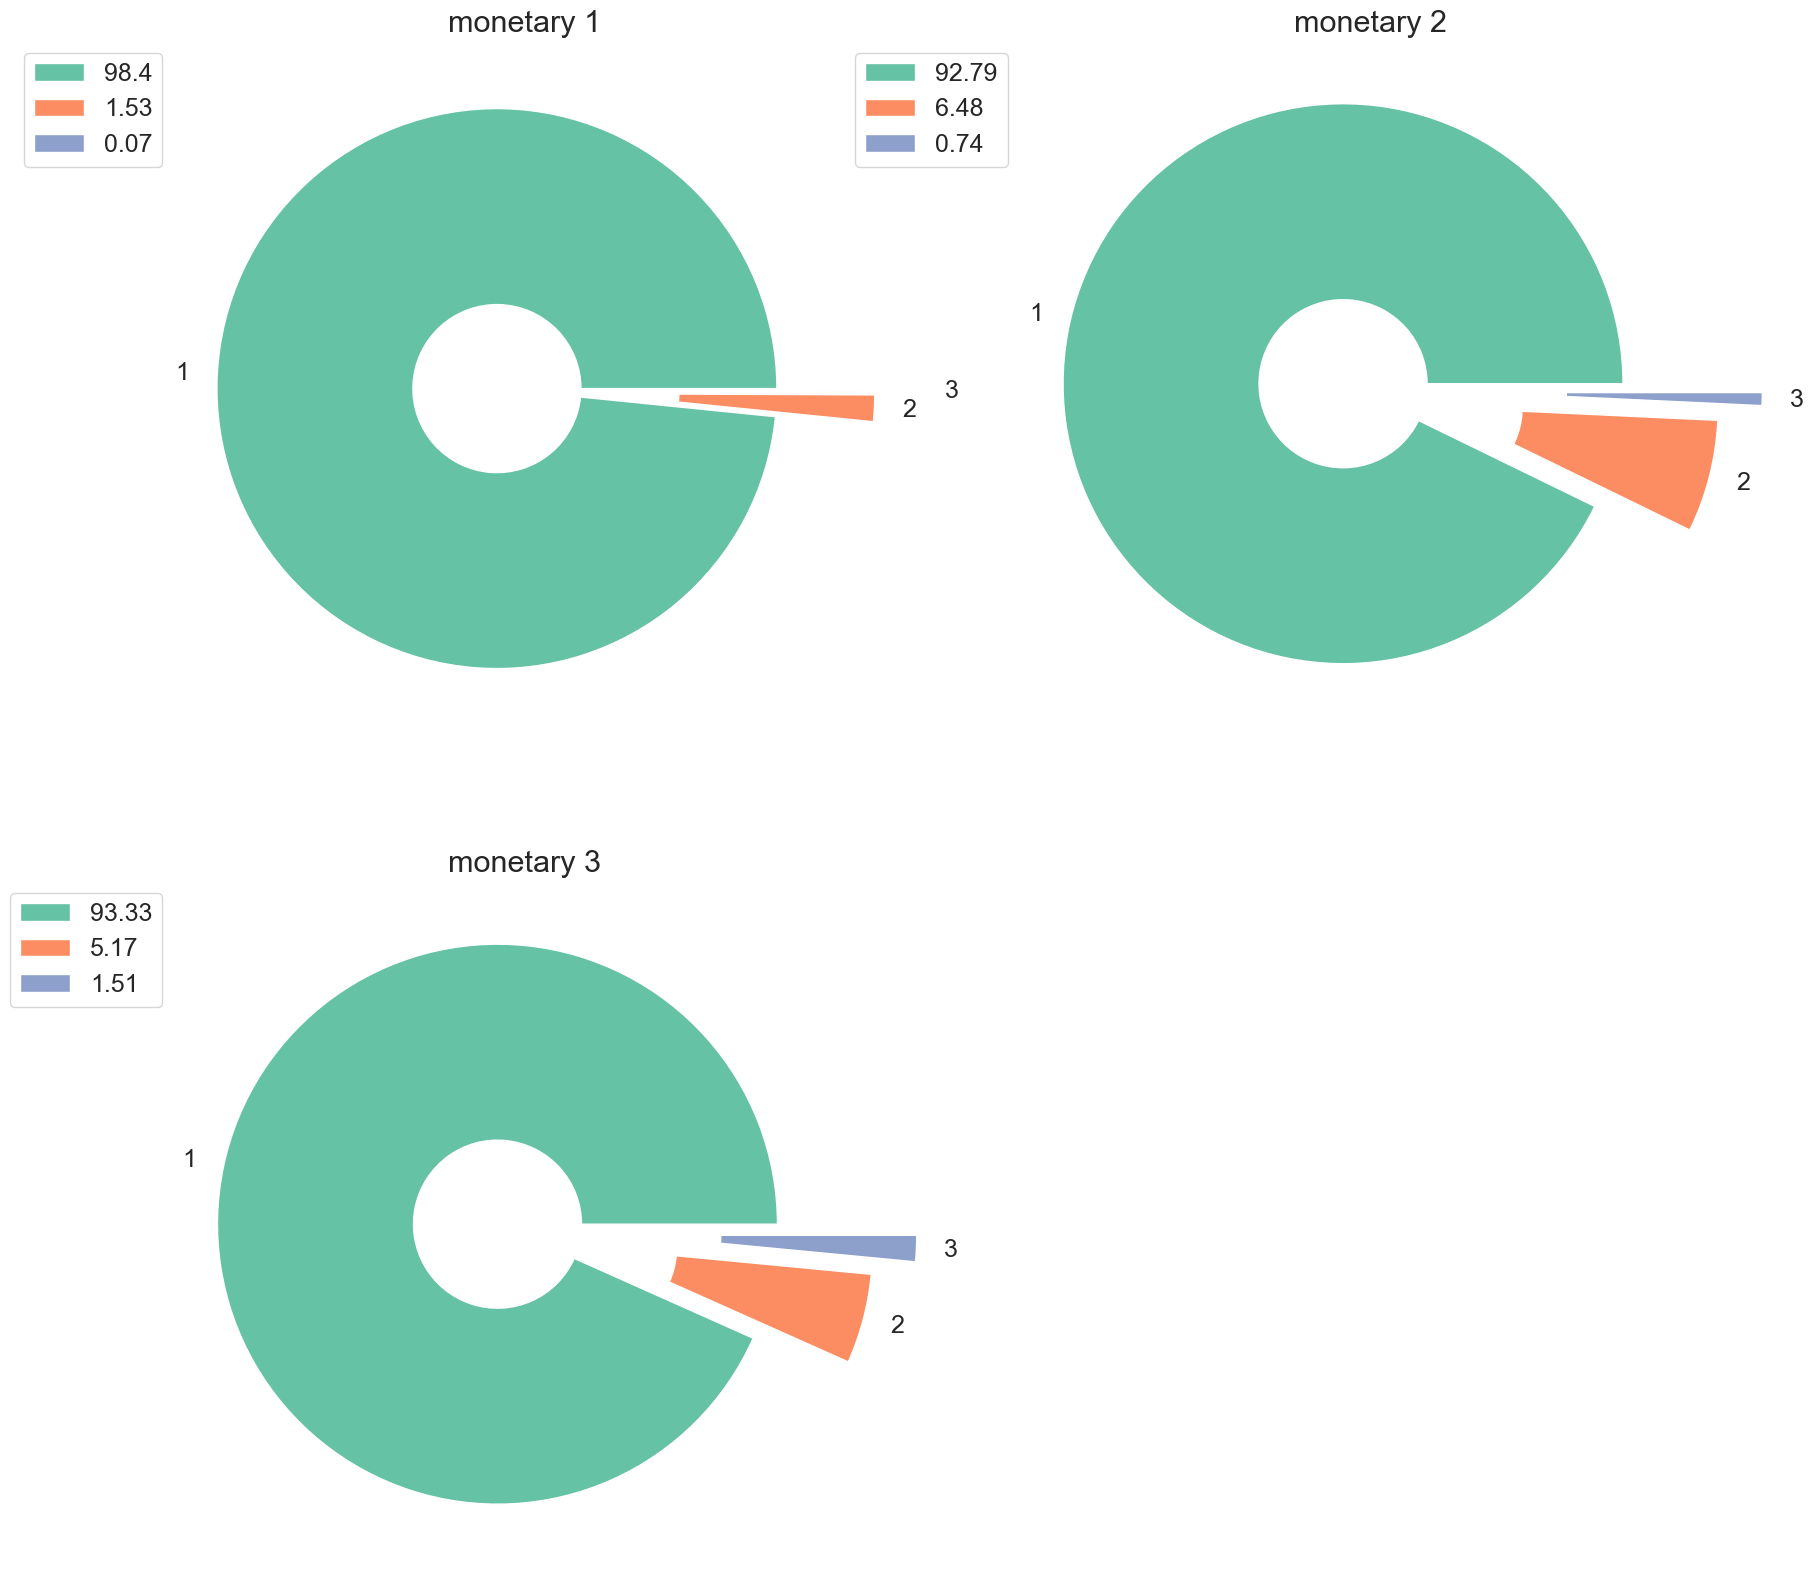

In [101]:
# рисуем графики
plt.figure(figsize=(20, 20))
plt.subplot(2, 2, 1)
plt.title('monetary 1', fontsize=22)
result = plt.pie(x=data1, labels=labels, explode=explode, wedgeprops=dict(
    width=0.7), textprops={'fontsize': 18}, colors=sns.color_palette('Set2'))
plt.legend(result[0], data1,  bbox_to_anchor=(0.00, 1), fontsize=18)
plt.subplot(2, 2, 2)
plt.title('monetary 2', fontsize=22)
result = plt.pie(x=data2, labels=labels, explode=explode, wedgeprops=dict(
    width=0.7), textprops={'fontsize': 18}, colors=sns.color_palette('Set2'))
plt.legend(result[0], data2,  bbox_to_anchor=(0.00, 1), fontsize=18)
plt.subplot(2, 2, 3)
plt.title('monetary 3', fontsize=22)
result = plt.pie(x=data3, labels=labels, explode=explode, wedgeprops=dict(
    width=0.7), textprops={'fontsize': 18}, colors=sns.color_palette('Set2'))
plt.legend(result[0], data3,  bbox_to_anchor=(0.00, 1), fontsize=18)
plt.show()

Проверим гипотезу о том, что соотношение количества пользователей из разных групп frequency в разных сегментах monetary одинаково. Условно говоря проверим, что диаграммы, представленные выше, не различаются

In [102]:
# считаем хи-квадрат
res = stats.chi2_contingency(MF.drop(columns=[1, 2, 3, 'total']))

## FR анализ вывод

In [103]:
print(
    f'Статистика критерия равна {res[0].round(4)}, уровень значимости {res[1].round(4)}')
if res[1] < 0.05:
    print('Уровень значимости меньше 0.05, значит мы отвергаем гипотезу о равенстве распределения frequency в трех группах monetary.\nНужен дополнительный анализ')
else:
    print('Уровень значимости больше 0.05, значит делаем вывод о том, что распределение количества пользователей по показателю frequency в разных сегментах monetary не различается. \nТо есть ситуация с удержанием пользователей не зависит от размера их заказа')

Статистика критерия равна 4.5395, уровень значимости 0.3379
Уровень значимости больше 0.05, значит делаем вывод о том, что распределение количества пользователей по показателю frequency в разных сегментах monetary не различается. 
То есть ситуация с удержанием пользователей не зависит от размера их заказа


Не смотря на то, что на диаграммах, представленных выше, видны небольшие отличия, уровень значимости критерия хи-квадрат больше 0.05, поэтому делаем вывод о том, что различия статистически не значимые, распределение количества пользователей по показателю frequency в разных сегментах monetary не различается. 